# Overplotting ShakeMaps

This notebook documents how to stash the matplotlib Figure objects representing the IMT maps created by ShakeMap. These Figure "pickle" files can be imported into a Jupyter notebook like this one and overplotted with other data of interest.

To create these pickle files, call add a "-p" flag to the mapping module. This will result, for every IMT map produced by the mapping module, there will be a corresponding .pickle file.

An example (with Northridge), turning off the plotting of macroseismic data:

`shake ci3144585 assemble -c"test" model -m mapping -p`

This will result in the following files being created in the "products" folder for the event:

 - intensity.pickle
 - pga.pickle
 - pgv.pickle
 - psa0p3.pickle
 - psa0p6.pickle
 - psa1p0.pickle
 - psa3p0.pickle

In the example below, we will load the PGV map resulting from the above command, and plot some features on top of it.

Some resources for the user:

 - An [introduction](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) to Jupyter notebooks.
 - An [overview](https://matplotlib.org/stable/gallery/color/named_colors.html) of colors available in Matplotlib.
 - An [overview](https://matplotlib.org/stable/api/markers_api.html) of marker types available in Matplotlib.
 - An [explanation](https://matplotlib.org/stable/users/explain/colors/colors.html) of how colors are specified in Matplotlib.
 - A [demo](https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html) of how plotting order (zorder) works in Matplotlib.
 - A convenient HTML [color picker](https://www.w3schools.com/colors/colors_picker.asp)
 - An [explanation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) of how geographic projections work in Cartopy.

In [14]:
%matplotlib inline

In [15]:
import cartopy.crs as ccrs  # projections
import cartopy.io.shapereader as shpreader
import dill
import fiona
import matplotlib.image as image
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import pyproj
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from matplotlib import patches
from matplotlib.colors import LightSource
from matplotlib.font_manager import FontProperties
from shapely.geometry import GeometryCollection
from shapely.geometry import LineString as sLineString
from shapely.geometry import Polygon as sPolygon
from shapely.geometry import mapping
from shapely.geometry import shape as sShape


Provide the path to the pickle file you wish to overplot.

In [16]:
pickle_file = "data/pgv.pickle"

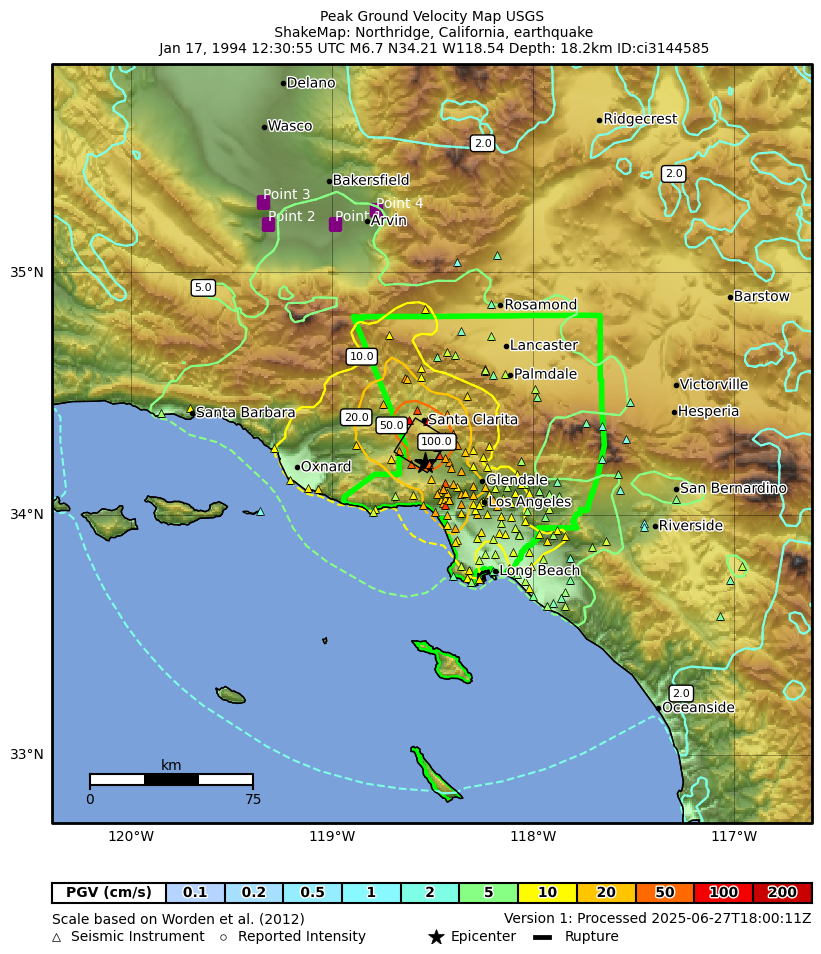

In [17]:
# load the pickle file into a Figure object in the current namespace
with open(pickle_file, "rb") as fobj:
    figure = dill.load(fobj)
# A Figure object can contain many Axes objects. The second of these represents the actual map
ax = figure.axes[0]
######### plot a few points of interest ############
# first load data from the points.csv file using the pandas package
# The column headers here have leading spaces, the skipinitialspace argument removes these
points = pd.read_csv("data/points.csv", skipinitialspace=True)
for idx, row in points.iterrows():
    longitude = row["longitude"]
    latitude = row["latitude"]
    label = row["point label"]
    ax.plot(longitude, latitude, marker="s", markersize=8,color="purple",zorder=100, transform=ccrs.PlateCarree())
    ax.text(longitude, latitude, label,horizontalalignment='left',verticalalignment='bottom',color="white",zorder=101,transform=ccrs.PlateCarree())
######### plot a few points of interest ############
######### plot a user-defined polygon of interest ############
# # the zip function takes two lists and zips them together:
# # x = [1,2,3] y = [4,5,6] list(zip(x,y)) => [(1,4),(2,5),3,6)]
lats = [34.315,34.328,34.293,34.282,34.315]
lons = [-118.500,-118.473,-118.448,-118.475,-118.500]
vertices = list(zip(lons,lats))
# # create a matplotlib Polygon object, defining it's rendering properties (color, zorder, etc.)
polygon = patches.Polygon(xy=vertices,facecolor="cornflowerblue",transform=ccrs.PlateCarree(),zorder=1000)
ax.add_patch(polygon)
######### plot a user-defined polygon of interest ############
# draw a shapefile representing the boundaries of Los Angeles County ##########
shapefile = "data/County_Boundary_geo.shp"
shape_feature = ShapelyFeature(Reader(shapefile).geometries(),
ccrs.PlateCarree(), facecolor='none',
edgecolor="lime",zorder=500, linewidth=4)
ax.add_feature(shape_feature)
# draw a shapefile representing the boundaries of Los Angeles County ##########
figure.show()
# figure1.savefig("pipeline_map.pdf")